# Use Random Forest Algorithm to design a Classfication Model

## Importing Libraries

In [ ]:
# Bagged Decision Tree for classification

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [ ]:
xls = pd.ExcelFile('glass.xlsx')

# Now you can list all sheets in the file
xls.sheet_names

['Description', 'glass']

In [ ]:
# to read just one sheet to dataframe:
df = pd.read_excel('glass.xlsx', sheet_name="glass")
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## Let's understand each column

In [ ]:
# to read just one sheet to dataframe:

pd.set_option('display.max_colwidth', None)
description = pd.read_excel('glass.xlsx', sheet_name="Description")
description

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,"Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)"
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


## Perform EDA on Dataset

In [ ]:
df.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [ ]:
df.shape

(214, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Handling Null values

In [ ]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# Boxplot to find Outliers

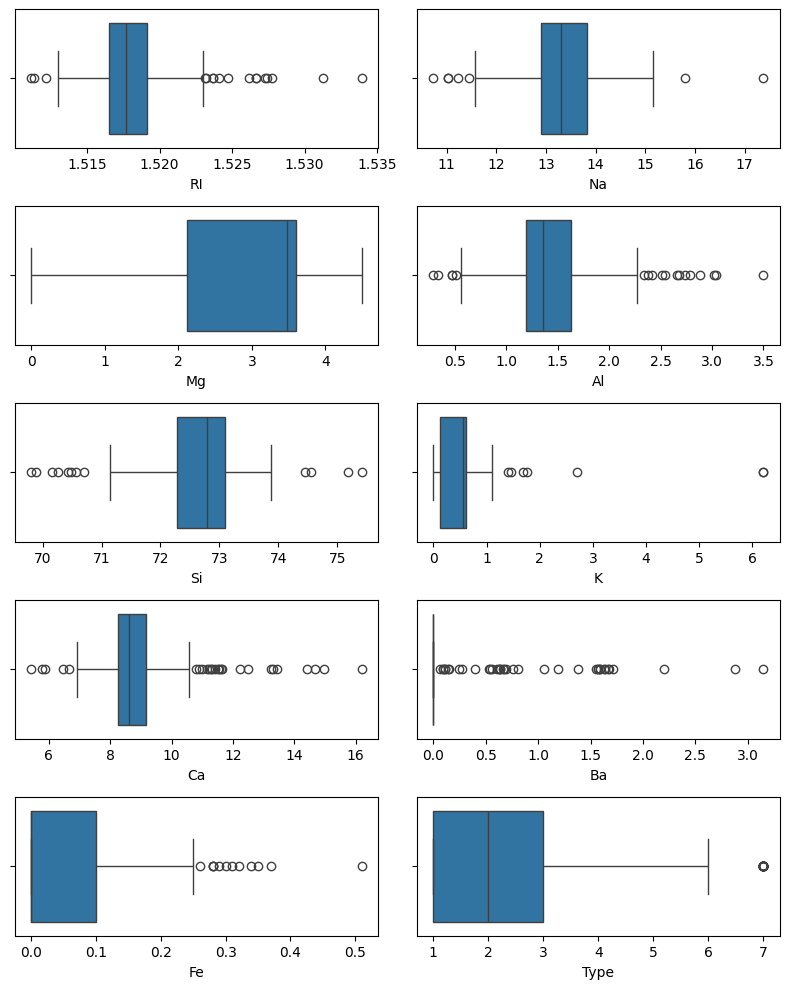

In [ ]:
# boxplot for given dataset using sns library subplots

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
# sns.boxplot(data=df, orient="h", ax=axes[0,0]) # Plots all columns at once.
sns.boxplot(x=df['RI'], ax=axes[0, 0])
sns.boxplot(x=df['Na'], ax=axes[0, 1])
sns.boxplot(x=df['Mg'], ax=axes[1, 0])
sns.boxplot(x=df['Al'], ax=axes[1, 1])
sns.boxplot(x=df['Si'], ax=axes[2, 0])
sns.boxplot(x=df['K'], ax=axes[2, 1])
sns.boxplot(x=df['Ca'], ax=axes[3, 0])
sns.boxplot(x=df['Ba'], ax=axes[3, 1])
sns.boxplot(x=df['Fe'], ax=axes[4, 0])
sns.boxplot(x=df['Type'], ax=axes[4, 1])

plt.tight_layout()
plt.show()

## Checking for the Normal Distribution in the data using Distplot

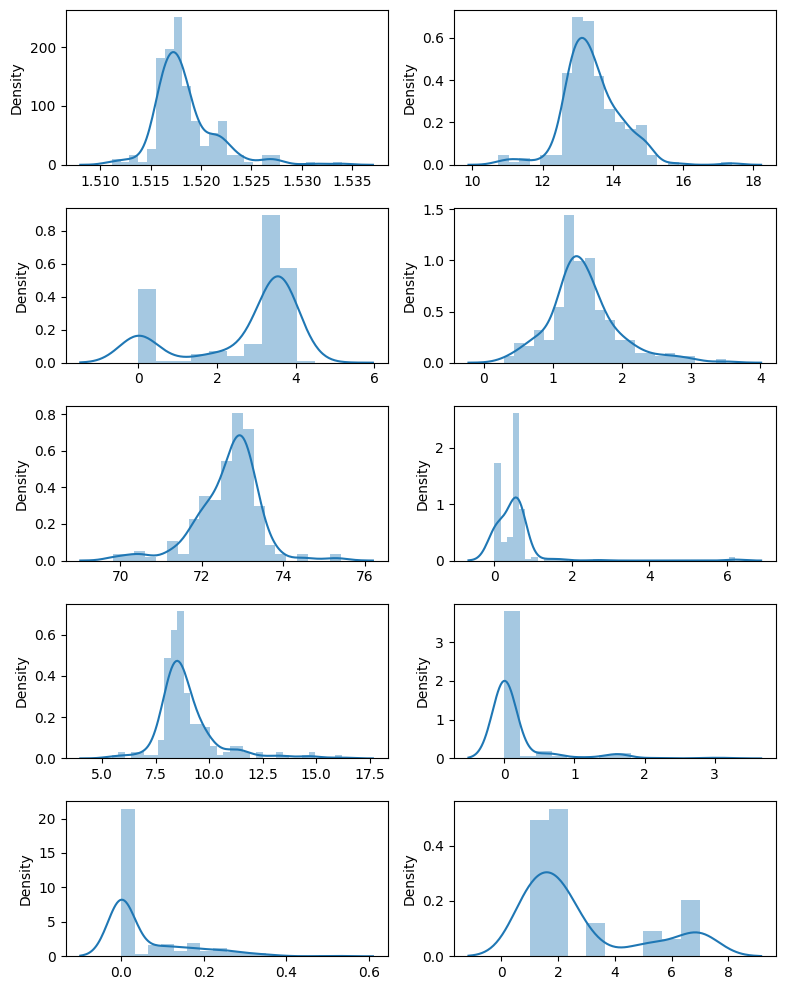

In [ ]:
# boxplot for given dataset using sns library subplots

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))

sns.distplot(x=df['RI'], ax=axes[0, 0])
sns.distplot(x=df['Na'], ax=axes[0, 1])
sns.distplot(x=df['Mg'], ax=axes[1, 0])
sns.distplot(x=df['Al'], ax=axes[1, 1])
sns.distplot(x=df['Si'], ax=axes[2, 0])
sns.distplot(x=df['K'], ax=axes[2, 1])
sns.distplot(x=df['Ca'], ax=axes[3, 0])
sns.distplot(x=df['Ba'], ax=axes[3, 1])
sns.distplot(x=df['Fe'], ax=axes[4, 0])
sns.distplot(x=df['Type'], ax=axes[4, 1])

plt.tight_layout()
plt.show()

# Correlation between the Features


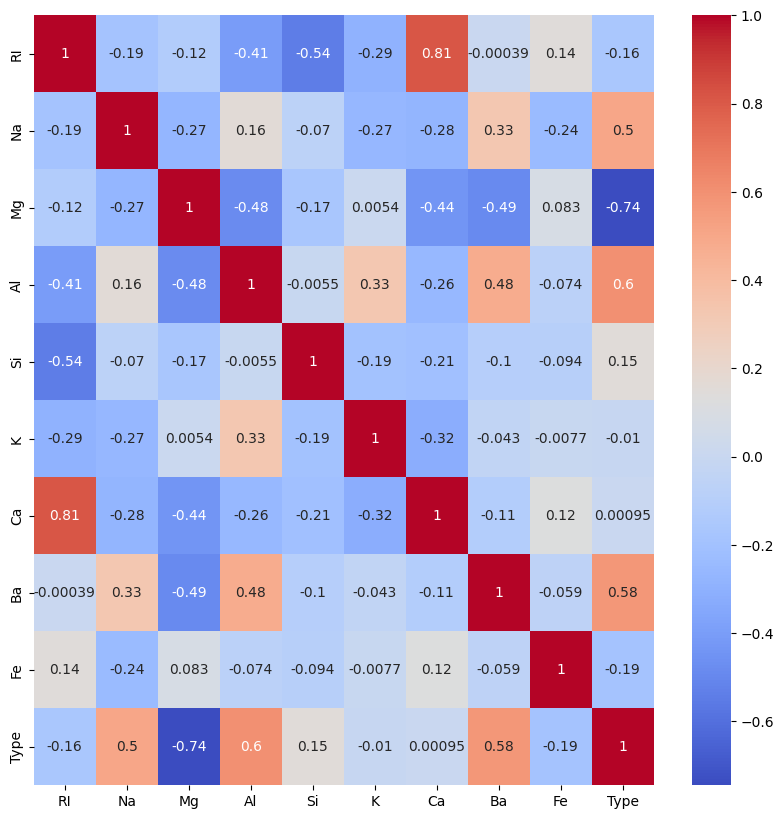

In [ ]:
correlation = df.corr()

plt.figure(figsize=(10, 10))

sns.heatmap(correlation,annot=True, cmap='coolwarm')
plt.show()

# Splitting the dataset int Train and Test Data

In [ ]:
array = df.values

In [ ]:
x = array[:, 0:10]
y = array[:, 9]

# Bagged Decision Tree Classification

In [ ]:
kfold = KFold(n_splits = 10, random_state=42, shuffle = True) # Dividing the dataset into sub samples
cart = DecisionTreeClassifier()

num_trees = 500
model = BaggingClassifier(base_estimator = cart, n_estimators=num_trees, random_state=42,)

results = cross_val_score(model, x, y, cv=kfold) # return's avg. accuracy of all DT's
results.mean() *100

100.0

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3 # root of total features => root 9

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features = max_features, random_state=42)

results = cross_val_score(model, x, y, cv=kfold)
results.mean() * 100

98.0952380952381

In [ ]:
# Using entropy and gini criteria in random forest

# Entropy
num_trees = 100
max_features = 3 # root of total features => root 9

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features = max_features, criterion='entropy', random_state=42)

results = cross_val_score(model, x, y, cv=kfold)
print(results.mean() * 100)

# Gini
num_trees = 100
max_features = 3 # root of total features => root 9

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features = max_features, criterion='gini', random_state=42)

results = cross_val_score(model, x, y, cv=kfold)
print(results.mean() * 100)


98.57142857142858
98.0952380952381


# AdaBoost Classification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=42)

results = cross_val_score(model, x, y, cv=kfold)
results.mean() * 100

81.77489177489177

# Stacking Ensemble for Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [ ]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

estimators = []

model1=LogisticRegression(max_iter=500, random_state=42)
estimators.append(('logistic', model1))

model2=DecisionTreeClassifier(random_state=42)
estimators.append(('cart', model2))

model3=SVC(random_state=42)
estimators.append(('svm', model3))

# Create the ensemble model

ensemble = VotingClassifier(estimators)

results = cross_val_score(ensemble,x,y,cv=kfold)
results.mean() * 100

92.01298701298703

# Conclusion

- from the above Ensemble models it's clear that Bagged Decision Tree has give the highest Accuracy of almost 100%, followed by Random Forest and Stacking Ensemble model

- AdaBoost Classifier has given the least Accuracy of 81.7 %

# Additional Notes:
## 1. Explain Bagging and Boosting methods. How is it different from each other.

**Bagging :**
- Bootstrap aggregating or Bagging is a ensemble meta-algorithm combining predictions form multiple decision trees through a majority voting mechanism
Eg: Random Forest

**Boosting :**
- models are built sequentially by minimizing the erros from previos models while increasing(or boosting) influence of high - performing models
Eg: AdaBoot

**Difference btw Bagging & Boosting :**
- In bagging all the models learn independently & their results are combined at the end.
- Whereas in boosting the error's in previous models are minimized in each step and final results of all the model's are combined.

<br>

## 2. Explain how to handle imbalance in the data.
- `Imbalance` in the data refers to a situation where the number of data points in different classes is not equal.
- This can be a problem for machine learning algorithms, as they may be biased towards the majority class and perform poorly on the minority class.

1. **Collect more data from the minority class:**
  - This is the most straightforward approach to handling imbalanced data. However, it can be time-consuming and expensive to collect new data.
2. **Use oversampling from minority class or undersampling from majority class techniques to balance the dataset:**
  - Oversampling involves duplicating instances from the minority class.
  - Undersampling involves removing instances from the majority class.
  - Both of these techniques can be used to create a balanced dataset.
3. **Use a decision tree algorithm that is designed to handle imbalanced data:**
  - Random Forest
  - XGBoost
  - These algorithms are designed to be more robust to imbalanced data than traditional decision tree algorithms.
4. **Evaluate the model's performance using a metric that is sensitive to imbalanced data:**
  - F1 score
  - ROC AUC
  - These metrics are designed to take into account the imbalanced nature of the data and provide a more accurate assessment of the model's performance.

 # **CODE :**

`from sklearn.ensemble import RandomForestClassifier`

` # Create a Random Forest classifier` <br>
`clf = RandomForestClassifier(class_weight='balanced')`

`# Fit the classifier to the training data` <br>
`clf.fit(X_train, y_train)`

`# Make predictions on the test data` <br>
`y_pred = clf.predict(X_test)`
